# Task 2: Machine Learning

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


## Data pre-processing

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170508288/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [3]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
labels_train = np.array([labels[i[0]] for i in y_train])
labels_test = np.array([labels[i[0]] for i in y_test])

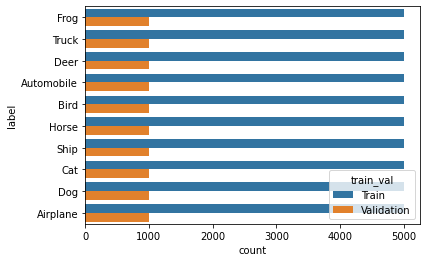

In [4]:
df_train = pd.DataFrame(labels_train,columns = ["label"])
df_test = pd.DataFrame(labels_test,columns = ["label"])
df_train["train_val"] = "Train"
df_test["train_val"] = "Validation"
df = pd.concat([df_train,df_test])
sns.countplot(y="label", data=df, hue='train_val')

## Feature engineering

In [5]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

In [7]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

## Model development

In [8]:
rf = RandomForestClassifier()
parameters = {
    'max_depth': [1, 5, 10, 50, 100],
"n_estimators": [1, 2, 4, 8, 16, 32, 50]
}

cv = GridSearchCV(rf, parameters, cv = 3)
cv.fit(x_train2,y_train)
print('BEST PARAMS: {}\n'.format(cv.best_params_))

BEST PARAMS: {'max_depth': 100, 'n_estimators': 50}



In [9]:
model=RandomForestClassifier(max_depth= 50, n_estimators= 50)

In [10]:
model.fit(x_train2,y_train)


RandomForestClassifier(max_depth=50, n_estimators=50)

## Performance assessment

In [11]:
y_pred=model.predict(x_test2)
y_pred

array([8, 8, 8, ..., 3, 6, 7], dtype=uint8)

In [12]:
print("Accuracy of random forest model is ",accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

Accuracy of random forest model is  0.4467
              precision    recall  f1-score   support

           0       0.57      0.53      0.55      1075
           1       0.54      0.49      0.51      1086
           2       0.33      0.34      0.34       961
           3       0.29      0.31      0.30       930
           4       0.38      0.36      0.37      1047
           5       0.35      0.39      0.37       881
           6       0.50      0.47      0.48      1070
           7       0.41      0.48      0.44       836
           8       0.59      0.58      0.58      1031
           9       0.52      0.48      0.50      1083

    accuracy                           0.45     10000
   macro avg       0.45      0.44      0.44     10000
weighted avg       0.45      0.45      0.45     10000



array([[567,  43,  99,  55,  55,  39,  10,  50, 101,  56],
       [ 43, 535,  47,  47,  25,  43,  35,  51,  92, 168],
       [ 67,  26, 331,  92, 151,  98,  95,  61,  21,  19],
       [ 18,  36,  87, 287,  73, 177,  96,  81,  31,  44],
       [ 31,  24, 166,  87, 380,  76, 132, 111,  21,  19],
       [ 14,  37,  67, 173,  49, 346,  56,  82,  34,  23],
       [ 22,  33, 104, 111, 135,  85, 499,  45,  14,  22],
       [ 28,  37,  49,  56,  83,  82,  32, 405,  16,  48],
       [162,  57,  28,  20,  27,  25,   9,  33, 593,  77],
       [ 48, 172,  22,  72,  22,  29,  36,  81,  77, 524]])

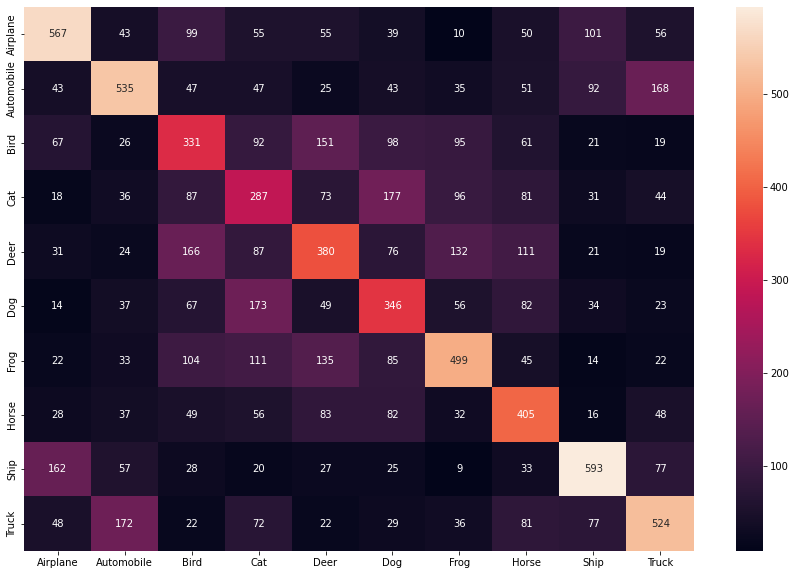

In [15]:
cf_matrix = confusion_matrix(y_pred,y_test)
display(cf_matrix)
plt.figure(figsize = (15, 10))
sns.heatmap(cf_matrix, annot=True, xticklabels=labels, yticklabels=labels, fmt = 'g')